# Read in file and get frequencies

In [54]:
import gzip

In [55]:
import numpy as np
from matplotlib import pyplot as plt

In [56]:
def get_files():
    import gzip
    
    MC = "MC_8MSTs_Gamma_spec_2.7_with_mono_removed_lapalma.txt"
    dfile = "97_strings.txt.gz"
    MC = "MC_8MSTs_Proton_with_mono_removed_lapalma.txt"
    dfile = "92_strings.txt.gz"
    
    MC_file = open(MC,"rt")
    data_file = gzip.open(dfile,"rt")
    return MC_file,data_file

## Check on Multiplicity

In [57]:
MC_file,data_file = get_files()

In [58]:
MC_nums = {}

numline,pnumline = 0,0
while line:=MC_file.readline():
    ntel = 8 - line.count('.')
    MC_nums[ntel] = MC_nums.get(ntel,0) + 1
    if ntel==8:
        print("All tels at line:",numline,"delta",numline-pnumline)
        pnumline = numline
    numline+=1
    l = line

MC_nums = dict(sorted(MC_nums.items()))

MC_nums

All tels at line: 18 delta 18
All tels at line: 31 delta 13
All tels at line: 58 delta 27
All tels at line: 61 delta 3
All tels at line: 86 delta 25
All tels at line: 91 delta 5
All tels at line: 172 delta 81
All tels at line: 259 delta 87
All tels at line: 287 delta 28
All tels at line: 377 delta 90
All tels at line: 442 delta 65
All tels at line: 488 delta 46
All tels at line: 492 delta 4
All tels at line: 515 delta 23
All tels at line: 528 delta 13
All tels at line: 530 delta 2
All tels at line: 537 delta 7
All tels at line: 615 delta 78
All tels at line: 654 delta 39
All tels at line: 736 delta 82
All tels at line: 770 delta 34
All tels at line: 859 delta 89
All tels at line: 910 delta 51
All tels at line: 937 delta 27
All tels at line: 1101 delta 164
All tels at line: 1140 delta 39
All tels at line: 1174 delta 34
All tels at line: 1184 delta 10
All tels at line: 1245 delta 61
All tels at line: 1308 delta 63
All tels at line: 1339 delta 31
All tels at line: 1347 delta 8
All tels at

{2: 2334, 3: 1002, 4: 511, 5: 312, 6: 160, 7: 115, 8: 122}

In [59]:
data_nums = {}

numline,pnumline = 0,0
while line:=data_file.readline():
    ntel = 8 - line.count('.')
    data_nums[ntel] = data_nums.get(ntel,0) + 1 
    if ntel==8:
        print("All tels at line:",numline,"delta",numline-pnumline)
        pnumline = numline
    numline+=1

data_nums = dict(sorted(data_nums.items()))

data_nums

All tels at line: 235 delta 235
All tels at line: 264 delta 29
All tels at line: 341 delta 77
All tels at line: 430 delta 89
All tels at line: 521 delta 91
All tels at line: 579 delta 58
All tels at line: 763 delta 184
All tels at line: 804 delta 41
All tels at line: 856 delta 52
All tels at line: 872 delta 16
All tels at line: 926 delta 54
All tels at line: 945 delta 19
All tels at line: 967 delta 22
All tels at line: 972 delta 5
All tels at line: 999 delta 27
All tels at line: 1009 delta 10
All tels at line: 1056 delta 47
All tels at line: 1068 delta 12
All tels at line: 1137 delta 69
All tels at line: 1172 delta 35
All tels at line: 1279 delta 107
All tels at line: 1323 delta 44
All tels at line: 1365 delta 42
All tels at line: 1543 delta 178
All tels at line: 1662 delta 119
All tels at line: 1876 delta 214
All tels at line: 1996 delta 120
All tels at line: 2197 delta 201
All tels at line: 2439 delta 242
All tels at line: 2468 delta 29
All tels at line: 2545 delta 77
All tels at lin

{2: 51919, 3: 22215, 4: 11205, 5: 6731, 6: 3373, 7: 2966, 8: 1593}

Text(0, 0.5, 'Frequency')

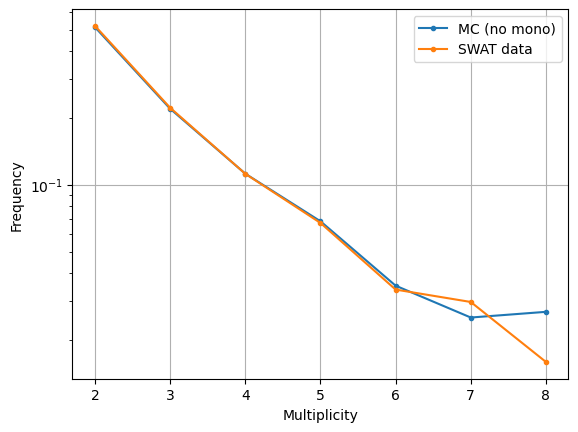

In [60]:
plt.plot(MC_nums.keys(),np.array(list(MC_nums.values()))/sum(MC_nums.values()),'.-',label="MC (no mono)")
plt.plot(data_nums.keys(),np.array(list(data_nums.values()))/sum(data_nums.values()),'.-',label="SWAT data")
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel("Multiplicity")
plt.ylabel("Frequency")

## Check on occurrences of characters

In [61]:
MC_file,data_file = get_files()

In [62]:
MC_freqs = {}

while line:=MC_file.readline():
    if line.count('.')>=7:
        continue
    for char in list(line)[:8]:
        MC_freqs[char] = MC_freqs.get(char,0) + 1

MC_freqs = dict(sorted(MC_freqs.items()))

MC_freqs

{'.': 22429,
 'a': 5593,
 'b': 1045,
 'c': 1080,
 'd': 1037,
 'e': 1005,
 'f': 894,
 'g': 752,
 'h': 568,
 'i': 515,
 'j': 362,
 'k': 289,
 'l': 235,
 'm': 164,
 'n': 141,
 'o': 82,
 'p': 68,
 'q': 50,
 'r': 46,
 's': 22,
 't': 14,
 'u': 20,
 'v': 12,
 'w': 10,
 'x': 1,
 'y': 11,
 'z': 3}

In [63]:
data_freqs = {}

nline = 0

while nline<10000 and (line:=data_file.readline()) :
    for char in list(line)[:8]:
        if ord(char)<122:
            data_freqs[char] = data_freqs.get(char,0) + 1
    nline += 1

data_freqs = dict(sorted(data_freqs.items()))

data_freqs

{'.': 49578,
 'a': 12361,
 'b': 1780,
 'c': 2793,
 'd': 1774,
 'e': 2540,
 'f': 1530,
 'g': 1987,
 'h': 1013,
 'i': 1352,
 'j': 651,
 'k': 721,
 'l': 406,
 'm': 441,
 'n': 262,
 'o': 238,
 'p': 132,
 'q': 152,
 'r': 65,
 's': 60,
 't': 21,
 'u': 47,
 'v': 19,
 'w': 27,
 'x': 2,
 'y': 28}

Text(0, 0.5, 'Frequency')

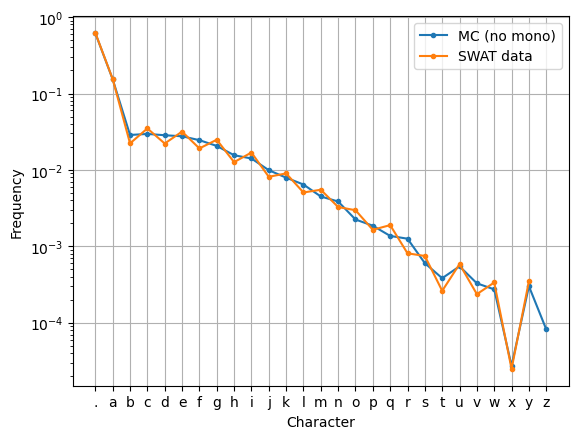

In [47]:
plt.plot(MC_freqs.keys(),np.array(list(MC_freqs.values()))/sum(MC_freqs.values()),'.-',label="MC (no mono)")
plt.plot(data_freqs.keys(),np.array(list(data_freqs.values()))/sum(data_freqs.values()),'.-',label="SWAT data")
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel("Character")
plt.ylabel("Frequency")

## Break it down by channel

In [48]:
ord('z')

122

In [49]:
MC_file,data_file = get_files()

In [50]:
MC_freqs = [{},{},{},{},{},{},{},{},]

while line:=MC_file.readline():
    if line.count('.')>=7:
        continue
    for i,char in enumerate(list(line)[:8]):
        if ord(char)<122:
            MC_freqs[i][char] = MC_freqs[i].get(char,0) + 1

for i in range(len(MC_freqs)):
  MC_freqs[i] = dict(sorted(MC_freqs[i].items()))

MC_freqs

[{'.': 2585,
  'a': 721,
  'b': 159,
  'c': 152,
  'd': 166,
  'e': 145,
  'f': 149,
  'g': 114,
  'h': 84,
  'i': 74,
  'j': 39,
  'k': 45,
  'l': 30,
  'm': 22,
  'n': 27,
  'o': 11,
  'p': 5,
  'q': 7,
  'r': 7,
  's': 3,
  't': 1,
  'u': 2,
  'v': 2,
  'w': 4},
 {'.': 2802,
  'a': 732,
  'b': 135,
  'c': 151,
  'd': 128,
  'e': 113,
  'f': 102,
  'g': 96,
  'h': 56,
  'i': 54,
  'j': 49,
  'k': 26,
  'l': 34,
  'm': 23,
  'n': 11,
  'o': 8,
  'p': 5,
  'q': 3,
  'r': 10,
  's': 5,
  't': 2,
  'u': 4,
  'v': 2,
  'w': 2,
  'y': 2},
 {'.': 2899,
  'a': 714,
  'b': 122,
  'c': 121,
  'd': 119,
  'e': 119,
  'f': 107,
  'g': 88,
  'h': 58,
  'i': 46,
  'j': 39,
  'k': 27,
  'l': 22,
  'm': 21,
  'n': 14,
  'o': 6,
  'p': 10,
  'q': 11,
  'r': 6,
  's': 1,
  'u': 4,
  'y': 1},
 {'.': 3042,
  'a': 648,
  'b': 110,
  'c': 101,
  'd': 95,
  'e': 99,
  'f': 92,
  'g': 68,
  'h': 57,
  'i': 58,
  'j': 44,
  'k': 36,
  'l': 32,
  'm': 12,
  'n': 17,
  'o': 11,
  'p': 11,
  'q': 3,
  'r': 4,
 

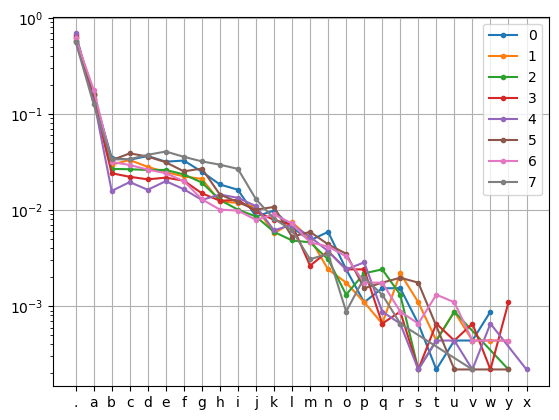

In [51]:
for i in range(len(MC_freqs)):
    plt.plot(MC_freqs[i].keys(),np.array(list(MC_freqs[i].values()))/sum(MC_freqs[i].values()),'.-',label=f"{i}")
plt.yscale('log')
plt.legend()
plt.grid()

In [52]:
data_freqs = [{},{},{},{},{},{},{},{},]

nline = 0

while nline<10000 and (line:=data_file.readline()) :
    for i,char in enumerate(list(line)[:8]):
        if ord(char)<122:
            data_freqs[i][char] = data_freqs[i].get(char,0) + 1
    nline += 1

for i in range(len(data_freqs)):
  data_freqs[i] = dict(sorted(data_freqs[i].items()))

data_freqs

[{'.': 5606,
  'a': 1488,
  'b': 257,
  'c': 465,
  'd': 248,
  'e': 462,
  'f': 235,
  'g': 357,
  'h': 148,
  'i': 245,
  'j': 81,
  'k': 117,
  'l': 74,
  'm': 56,
  'n': 62,
  'o': 26,
  'p': 9,
  'q': 17,
  'r': 10,
  's': 10,
  't': 2,
  'u': 6,
  'v': 6,
  'w': 9},
 {'.': 7265,
  'a': 1647,
  'b': 17,
  'c': 316,
  'd': 7,
  'e': 234,
  'f': 2,
  'g': 224,
  'h': 2,
  'i': 127,
  'j': 3,
  'k': 53,
  'm': 43,
  'o': 19,
  'q': 9,
  's': 13,
  'u': 8,
  'w': 5,
  'y': 6},
 {'.': 6332,
  'a': 1523,
  'b': 197,
  'c': 365,
  'd': 226,
  'e': 309,
  'f': 192,
  'g': 238,
  'h': 120,
  'i': 125,
  'j': 76,
  'k': 61,
  'l': 40,
  'm': 63,
  'n': 26,
  'o': 24,
  'p': 22,
  'q': 36,
  'r': 11,
  's': 2,
  'u': 9,
  'y': 2},
 {'.': 6555,
  'a': 1450,
  'b': 234,
  'c': 246,
  'd': 196,
  'e': 228,
  'f': 185,
  'g': 175,
  'h': 129,
  'i': 147,
  'j': 99,
  'k': 103,
  'l': 59,
  'm': 50,
  'n': 29,
  'o': 31,
  'p': 29,
  'q': 11,
  'r': 7,
  's': 4,
  't': 6,
  'u': 7,
  'v': 1,
  'w

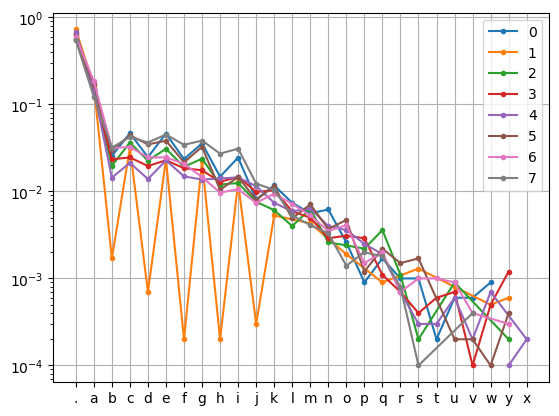

In [53]:
for i in range(len(data_freqs)):
    plt.plot(data_freqs[i].keys(),np.array(list(data_freqs[i].values()))/sum(data_freqs[i].values()),'.-',label=f"{i}")
plt.yscale('log')
plt.legend()
plt.grid()